# Die Bildverarbeitungspipeline (1/2) - Bildvorverarbeitung


![(misc/pipeline.png)](misc/pipeline.png)



## Kantenerkennung mittels Sobel Operator

In der ersten Übung sollen die Algorithmen für die ersten 3 Schritte der Bildverarbeitungspipeline durchgeführt werden. Diese Algorithmen führen die Bildvorverarbeitung aus. Hierbei handlet es sich ausschließlich um lokale Bildoperatoren, die nur einen oder nur benachbarte Pixel für die Berechnung benötigen. Diese Operationen können später auf Hardwarebeschleuinger ausgelagert werden.


Am Ende dieser Einheit soll ein Bild angezeigt werden, das ausschließlich die Kanten des Eingangsbildes zeigt:
![(misc/reference.png)](misc/reference.png)


Hinweise:
* Die Algorithmen sollen hier mit Python 3 beschrieben werden. Dabei sind vorab keine Python-Kenntnisse notwendig.  Einfache Sprachkonstrukte (Schleifen, Bedingungen, ...) sind hier gut beschrieben: https://www.learnpython.org/en/Welcome

* Codeabschnitte, die bearbeitet werden müssen, sind mit '### TODO ###' gekennzeichnet.

### Standard-Bibliotheken einbinden
Zuerst werden ein paar nützliche Bibliotheken geladen.

In [2]:
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
import cv2
%matplotlib inline


### Ausgabe eines Bildes

Im folgenden wird eine Bilddatei eingelesen und angezeigt.

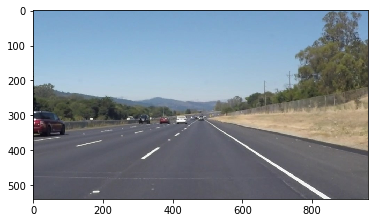

In [3]:

# Bild von Datei einlesen, image ist ein numpy.array mit Dimensionen MxNx3
image = mpimg.imread('test_images/solidWhiteRight.jpg')

# Bildformat des Originalbildes auslesen (Werte werden später benötigt)
height = image.shape[0]
width = image.shape[1]

# Bild anzeigen
plt.imshow(image) 

# Umwandlung in Graustufen

Nach dem Erfassen der Rohdaten müssen die Pixel in ein Graustufenformat umgewandelt werden. Eine mögliche Gewichtung der Kanäle R,G und B ist hier beschrieben: https://en.wikipedia.org/wiki/Grayscale

Und eine mögliche Gewichtung für ein kontrastreiches Bild ist:
R = 0.2126
G = 0.7152
B = 0.0722


In [3]:

# neues Graustufenbildbild mit dem gleichen Format wie das Eingangsbild generieren
image_gray = np.zeros(( height , width), dtype=np.int32)


# Den RGB-Wert von jedem Pixel im Originalbild auslesen und zu einem Grauwert zusammenfassen,
# der dann im Graustufenbild gespeichert wird

### TODO ###


### Ausgabe des Graustufenbildes

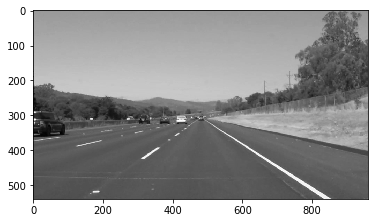

In [4]:
plt.imshow(image_gray, cmap='gray')

# Sobel

Nach der Konvertierung des Eingangsbildes in ein Graustufenbild sollen mit Hilfe des Sobel-Operators Kanten extrahiert werden. Durch zwei Faltungen werden die hochfrequenten Signale des Bildes, welche sich als Kanten äußern, in X- und Y-Richtung  herausgefiltert.

![Sobel X](https://wikimedia.org/api/rest_v1/media/math/render/svg/c96d59c0277f12277e5a1ddececccb590c25acd7)
![Sobel Y](https://wikimedia.org/api/rest_v1/media/math/render/svg/9e44c96b168ca744007f8d0f856c1ad94d76d4f4)

Die beiden Kantendetektionen können anschließend folgendermaßen zusammengefasst werden:
![Sobel X+Y](https://wikimedia.org/api/rest_v1/media/math/render/svg/dece0fbe3bb8abda927803b113d2ef18c4dd90d4)

Grundlegende Informationen zum Sobel-Operator sind hier zu finden:
https://de.wikipedia.org/wiki/Sobel-Operator



### Berechnung des Sobel X Operators

In [5]:

# neues Graustufenbildbild mit dem gleichen Format wie das Eingangsbild generieren
image_sobel_x = np.zeros(( height , width), dtype=np.int32)

# Sobel X Operator für jeden Punkt des Bildes ausführen. Dabei müssen die Randbereiche beachtet werden.

### TODO ###


### Berechnung des Sobel Y Operators

In [6]:

# neues Graustufenbildbild mit dem gleichen Format wie das Eingangsbild generieren
image_sobel_y = np.zeros(( height , width), dtype=np.int32)

# Sobel Y Operator für jeden Punkt des Bildes ausführen. Dabei müssen die Randbereiche beachtet werden.

### TODO ###


### Ausgabe der Sobel-X und Sobel-Y Transformation

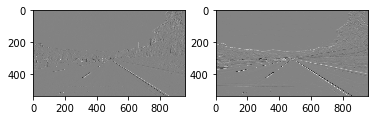

In [7]:
# Ausgabe der Bilder nebeneinander mittels Subplots

fig = plt.figure()

subplot1 = fig.add_subplot(121)
plt.imshow(image_sobel_x, cmap='gray')
subplot2 = fig.add_subplot(122)
plt.imshow(image_sobel_y, cmap='gray')

### Sobel-X und -Y Bilder vereinen

In [8]:
# neues Bild generieren
image_sobel = np.zeros(( height , width), dtype=np.int32)

# Geometrisches Mittel aus Sobel-X und Sobel-Y für jeden Pixel bilden

### TODO ###


array([[272, 223, 214, ..., 213, 222, 274],
       [223,  60,  19, ...,  16,  66, 224],
       [216,  22,  14, ...,  18,  14, 210],
       ..., 
       [171, 169,  46, ...,  53, 151, 171],
       [196, 275, 162, ..., 152, 250, 197],
       [255, 199, 166, ..., 172, 197, 253]], dtype=int32)

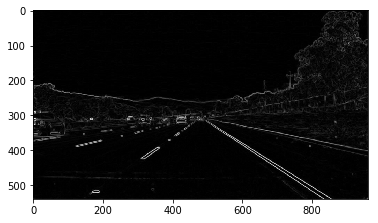

In [9]:
plt.imshow(image_sobel, cmap='gray')

# Schwellwertberechnung

Nun soll ein binäres Bild mittels eines Schwellwerts aus dem enstandenen Sobelbild berechnet werden. Probieren Sie verschiedene Schwellwerte in Abhängigkeit ihrer Sobelwerte aus, um sich dem optimalen Schwellwert anzunähern. Die so detektierten Punkte sind die Grundlage für die spätere Hough Transformation.

In [17]:
# neues Bild generieren
image_sobel_threshold = np.zeros(( height , width), dtype=np.int32)

# jeden Pixel im Bild überprüfen, ob er unter- oder oberhalb des Schwellwerts liegt.

### TODO ###


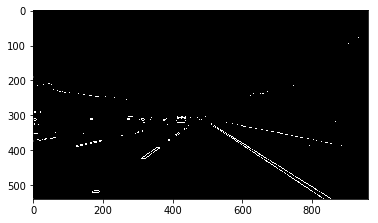

In [18]:
plt.imshow(image_sobel_threshold, cmap='gray')